In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
						 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
#create a scatter plot for data points
 for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
			    alpha=0.8, c=cmap(idx),
			    marker=markers[idx], label=cl)

In [3]:
from sklearn.linear_model import perceptron
from sklearn.datasets import make_classification

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
X, y = make_classification(30, 2, 2, 0, weights=[.3, .3], random_state=300)

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2, n_redundant=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


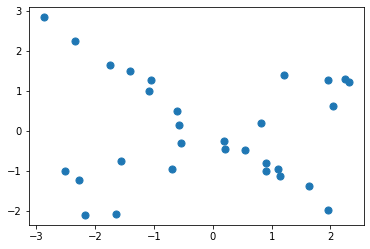

In [5]:
plt.scatter(X[:,0], X[:,1], s=50)

In [6]:
pct = perceptron.Perceptron(max_iter=100, verbose=0, random_state=300,
							fit_intercept=True, eta0=0.002)
pct.fit(X, y)

Perceptron(eta0=0.002, max_iter=100, random_state=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


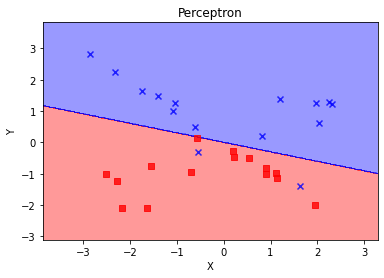

In [7]:
plot_decision_regions(X, y, classifier=pct)
plt.title('Perceptron')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()